In [1]:
!wget "https://s3.eu-central-1.amazonaws.com/avg-kitti/data_road.zip"

--2020-04-30 12:34:53--  https://s3.eu-central-1.amazonaws.com/avg-kitti/data_road.zip
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 52.219.140.27
Connecting to s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)|52.219.140.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 470992343 (449M) [application/zip]
Saving to: ‘data_road.zip’

data_road.zip       100%[===================>] 449.17M  27.2MB/s    in 18s     

2020-04-30 12:35:11 (25.1 MB/s) - ‘data_road.zip’ saved [470992343/470992343]



In [2]:
!unzip data_road.zip

Archive:  data_road.zip
   creating: data_road/
   creating: data_road/training/
   creating: data_road/testing/
   creating: data_road/training/image_2/
  inflating: data_road/training/image_2/umm_000032.png  
  inflating: data_road/training/image_2/umm_000031.png  
  inflating: data_road/training/image_2/umm_000030.png  
  inflating: data_road/training/image_2/umm_000029.png  
  inflating: data_road/training/image_2/umm_000028.png  
  inflating: data_road/training/image_2/umm_000027.png  
  inflating: data_road/training/image_2/umm_000026.png  
  inflating: data_road/training/image_2/umm_000025.png  
  inflating: data_road/training/image_2/umm_000024.png  
  inflating: data_road/training/image_2/umm_000023.png  
  inflating: data_road/training/image_2/umm_000022.png  
  inflating: data_road/training/image_2/umm_000021.png  
  inflating: data_road/training/image_2/umm_000020.png  
  inflating: data_road/training/image_2/umm_000019.png  
  inflating: data_road/training/image_2/umm_0000

In [0]:
!cd data_road/training/gt_image_2/ && find -type f -name '*lane*' -delete

In [4]:
!cd data_road/training/gt_image_2/ && ls

umm_road_000000.png  um_road_000001.png  uu_road_000003.png
umm_road_000001.png  um_road_000002.png  uu_road_000004.png
umm_road_000002.png  um_road_000003.png  uu_road_000005.png
umm_road_000003.png  um_road_000004.png  uu_road_000006.png
umm_road_000004.png  um_road_000005.png  uu_road_000007.png
umm_road_000005.png  um_road_000006.png  uu_road_000008.png
umm_road_000006.png  um_road_000007.png  uu_road_000009.png
umm_road_000007.png  um_road_000008.png  uu_road_000010.png
umm_road_000008.png  um_road_000009.png  uu_road_000011.png
umm_road_000009.png  um_road_000010.png  uu_road_000012.png
umm_road_000010.png  um_road_000011.png  uu_road_000013.png
umm_road_000011.png  um_road_000012.png  uu_road_000014.png
umm_road_000012.png  um_road_000013.png  uu_road_000015.png
umm_road_000013.png  um_road_000014.png  uu_road_000016.png
umm_road_000014.png  um_road_000015.png  uu_road_000017.png
umm_road_000015.png  um_road_000016.png  uu_road_000018.png
umm_road_000016.png  um_road_000017.png 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
train_image_dir_l = 'data_road/training/image_2/'

train_image_dir = 'data_road/training/gt_image_2/'

masks=  [(train_image_dir+f) for f in listdir(train_image_dir) if isfile(join(train_image_dir, f))]
images = [(train_image_dir_l+f) for f in listdir(train_image_dir_l) if isfile(join(train_image_dir_l, f))]

df = pd.DataFrame(np.column_stack([images, masks]), columns=['images', 'masks'])


print(df)

                                        images                                              masks
0     data_road/training/image_2/um_000082.png   data_road/training/gt_image_2/uu_road_000089.png
1     data_road/training/image_2/um_000023.png  data_road/training/gt_image_2/umm_road_000066.png
2    data_road/training/image_2/umm_000030.png   data_road/training/gt_image_2/uu_road_000003.png
3     data_road/training/image_2/um_000005.png  data_road/training/gt_image_2/umm_road_000069.png
4     data_road/training/image_2/uu_000055.png   data_road/training/gt_image_2/uu_road_000045.png
..                                         ...                                                ...
284   data_road/training/image_2/uu_000085.png   data_road/training/gt_image_2/um_road_000086.png
285   data_road/training/image_2/um_000056.png   data_road/training/gt_image_2/uu_road_000055.png
286   data_road/training/image_2/um_000004.png   data_road/training/gt_image_2/uu_road_000006.png
287  data_road/train

In [3]:
df1 = df.sort_values(by='images')['images'].reset_index()
df2 = df.sort_values(by='masks')['masks'].reset_index()
df['images'] = df1['images']
df['masks'] = df2['masks']
del df1, df2
print(df)

                                       images                                             masks
0    data_road/training/image_2/um_000000.png  data_road/training/gt_image_2/um_road_000000.png
1    data_road/training/image_2/um_000001.png  data_road/training/gt_image_2/um_road_000001.png
2    data_road/training/image_2/um_000002.png  data_road/training/gt_image_2/um_road_000002.png
3    data_road/training/image_2/um_000003.png  data_road/training/gt_image_2/um_road_000003.png
4    data_road/training/image_2/um_000004.png  data_road/training/gt_image_2/um_road_000004.png
..                                        ...                                               ...
284  data_road/training/image_2/uu_000093.png  data_road/training/gt_image_2/uu_road_000093.png
285  data_road/training/image_2/uu_000094.png  data_road/training/gt_image_2/uu_road_000094.png
286  data_road/training/image_2/uu_000095.png  data_road/training/gt_image_2/uu_road_000095.png
287  data_road/training/image_2/uu_00009

(289, 320, 480, 3)
(289, 320, 480, 1)
(231, 320, 480, 3)
(58, 320, 480, 1)


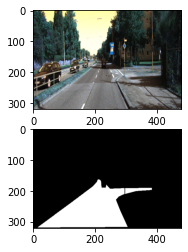

In [4]:
data = []
masks = []
dim = (480, 320)


for i in range(df.shape[0]):
    temp = cv2.imread(df['images'][i])
    temp = cv2.resize(temp, dim)
    data.append(temp)

for i in range(df.shape[0]):
    temp = cv2.imread(df['masks'][i])
    temp = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
    ret,temp = cv2.threshold(temp,100,255,cv2.THRESH_BINARY)
    temp = cv2.resize(temp, dim)
    masks.append(temp)

data = np.array(data) / 255.0
masks = np.array(masks) / 255.0
# data = data.reshape((289, data.shape[1] * data.shape[2]*data.shape[3]))
masks = masks.reshape((289, masks.shape[1], masks.shape[2], 1))

print(data.shape)
print(masks.shape)

(trainX, testX, trainY, testY) = train_test_split(data, masks, test_size=0.2, shuffle=False)

print(trainX.shape)
print(testY.shape)
f, ax1 = plt.subplots(2)
ax1[0].imshow(trainX[11])
# ax1[1].imshow(trainY[0])

ax1[1].imshow(trainY[11].reshape(masks.shape[1], masks.shape[2]), cmap = 'gray')

In [0]:
def unet(pretrained_weights=None, input_size=(dim[1], dim[0], 3),num_class=2):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
        UpSampling2D(size=(2, 2))(drop5))

    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)

    up7 = Conv2D(256, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
        UpSampling2D(size=(2, 2))(conv6))
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)

    up8 = Conv2D(128, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
        UpSampling2D(size=(2, 2))(conv7))
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)

    up9 = Conv2D(64, 2, activation='relu', padding='same', kernel_initializer='he_normal')(
        UpSampling2D(size=(2, 2))(conv8))
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)
    conv9 = Conv2D(num_class, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)
    if num_class == 2:
        conv10 = Conv2D(1, 1, activation='sigmoid')(conv9)
        loss_function = 'binary_crossentropy'
    else:
        conv10 = Conv2D(num_class, 1, activation='softmax')(conv9)
        loss_function = 'categorical_crossentropy'
    model = Model(input=inputs, output=conv10)

    model.compile(optimizer=Adam(lr=1e-4), loss=loss_function, metrics=["accuracy"])
    # model.summary()

    if (pretrained_weights):
        model.load_weights(pretrained_weights)
    return model

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


Train on 231 samples, validate on 58 samples
Epoch 1/30
231/231 [==============================] - 141s 609ms/step - loss: 0.4100 - accuracy: 0.8093 - val_loss: 0.2980 - val_accuracy: 0.8679

Epoch 00001: val_loss improved from inf to 0.29804, saving model to ./Kitti_model_v1.hdf5
Epoch 2/30
231/231 [==============================] - 97s 420ms/step - loss: 0.2526 - accuracy: 0.8211 - val_loss: 0.3975 - val_accuracy: 0.8513

Epoch 00002: val_loss did not improve from 0.29804
Epoch 3/30
231/231 [==============================] - 97s 418ms/step - loss: 0.2380 - accuracy: 0.9090 - val_loss: 0.2090 - val_accuracy: 0.9003

Epoch 00003: val_loss improved from 0.29804 to 0.20899, saving model to ./Kitti_model_v1.hdf5
Epoch 4/30
231/231 [==============================] - 96s 417ms/step - loss: 0.1968 - accuracy: 0.9383 - val_loss: 0.1967 - val_accuracy: 0.9180

Epoch 00004: val_loss improved from 0.20899 to 0.19670, saving model to ./Kitti_model_v1.hdf5
Epoch 5/30
231/231 [=====================

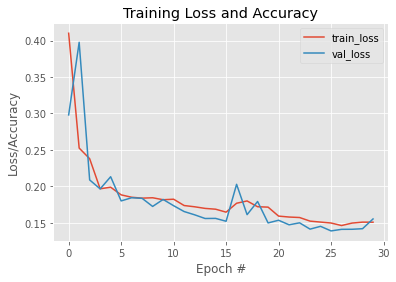

In [6]:
model = unet()

EPOCHS = 30
BS = 8

model_checkpoint = ModelCheckpoint('./Kitti_model_v1.hdf5', monitor='val_loss',verbose=1,save_best_only=True)
'''
aug = ImageDataGenerator(
                        rotation_range=0.2,
                        width_shift_range=0.05,
                        height_shift_range=0.05,
                        shear_range=0.05,
                        zoom_range=0.05,
                        vertical_flip=True,
                        horizontal_flip=True,
                        fill_mode='nearest')

H = model.fit_generator(
                        aug.flow(trainX, trainY, batch_size=BS, shuffle=False),
                        validation_data=(testX, testY),
                        steps_per_epoch=100,
                        epochs=EPOCHS,
                        callbacks=[model_checkpoint])
'''
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=EPOCHS, batch_size=BS, callbacks=[model_checkpoint])

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


(1, 320, 480, 3)
(1, 320, 480, 1)


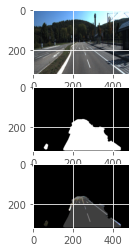

In [8]:
model = unet('./Kitti_model_v1.hdf5')

image_path = 'data_road/testing/image_2/umm_000085.png'
image_src = plt.imread(image_path)
image_src = cv2.resize(image_src, dim)

image = image_src.reshape(1, image_src.shape[0], image_src.shape[1], image_src.shape[2])
print(image.shape)
res = model.predict(image)
print(res.shape)
res = res.reshape(dim[1], dim[0])
ret, res = cv2.threshold(res, 0.5, 1, cv2.THRESH_BINARY)
image__ = cv2.cvtColor(res, cv2.COLOR_GRAY2RGB)
final = cv2.bitwise_and(image__, image_src)

f, ax1 = plt.subplots(3)
ax1[0].imshow(image_src)
ax1[1].imshow(res, cmap='gray')
ax1[2].imshow(final)
